# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#Import API key
from api_keys import weather_api_key

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identify closest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0],lat_lng[1]).country_code
    
#If city is unique, add to cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

#Print the city count to confirm sufficient count
len(cities)

634

In [3]:
#Create a dataframe to store the data
city_temp = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Wind Speed': ""})


#Preview the dataframe
#city_temp.head(50)
city_temp.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,thompson,,CA,,,,,,
1,erzin,,RU,,,,,,
2,mar del plata,,AR,,,,,,
3,kapaa,,US,,,,,,
4,tiksi,,RU,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Variables used to track responses
record = 0
set = 1

params = {"weather_api_key": weather_api_key}

url =  "http://api.openweathermap.org/data/2.5/weather?q="
print('''
Beginning Data Retrieval     
-----------------------------''')
#iterates through each row in city_temp data frame
for index, row in city_temp.iterrows(): 

#Query URL; updates City & Country variables from city_temp data frame each row iteration
    updated_url = url + row['City'] + ',' + row['Country'] + '&units=imperial'+'&APPID=' + weather_api_key

#Pulls data from URL/converts to JSON format  
    response = requests.get(updated_url).json()
        
    try:
        
#Prints retrieval information
        print(f'Processing Record {record} of Set {set} | {response["name"]}')
        
#Inputs retrieved API data into city_temp data frame
        city_temp.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_temp.loc[index, 'Date'] = response['dt']
        city_temp.loc[index, 'Humidity'] = response['main']['humidity']
        city_temp.loc[index, 'Lat'] = response['coord']['lat']
        city_temp.loc[index, 'Lng'] = response['coord']['lon']
        city_temp.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_temp.loc[index, 'Wind Speed'] = response['wind']['speed']
        
#Increases the record count by one each iteration
        record += 1

#Skips records with either key or index error; prints notification for each error identified
    except (KeyError, IndexError):
        print("City not found. Skipping...")   

#Increases set number by 1 when record number is greater than 50, record number is reset to 0
    if record > 50:
        set += 1
        record = 0

#Notification that all data is retrieved
print('''
-----------------------------
Data Retrieval Complete
-----------------------------''')      


Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | Thompson
Processing Record 1 of Set 1 | Erzin
Processing Record 2 of Set 1 | Mar del Plata
Processing Record 3 of Set 1 | Kapaa
Processing Record 4 of Set 1 | Tiksi
Processing Record 5 of Set 1 | Chokurdakh
Processing Record 6 of Set 1 | Tuatapere
Processing Record 7 of Set 1 | Oron
Processing Record 8 of Set 1 | Buctzotz
Processing Record 9 of Set 1 | Rundu
Processing Record 10 of Set 1 | Ribeira Grande
Processing Record 11 of Set 1 | Caçu
Processing Record 12 of Set 1 | Puerto Ayora
Processing Record 13 of Set 1 | Punta Arenas
Processing Record 14 of Set 1 | Jamestown
City not found. Skipping...
Processing Record 15 of Set 1 | Longyearbyen
Processing Record 16 of Set 1 | Bethel
Processing Record 17 of Set 1 | Ushuaia
Processing Record 18 of Set 1 | Villazón
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of Set 1 | Ahipara
Processing Record 20 of Set 1 | Coyhaique


Processing Record 27 of Set 4 | Lafia
Processing Record 28 of Set 4 | Konya Province
City not found. Skipping...
Processing Record 29 of Set 4 | Nizhniy Kuranakh
Processing Record 30 of Set 4 | Bodden Town
Processing Record 31 of Set 4 | Moose Factory
Processing Record 32 of Set 4 | Berlevåg
City not found. Skipping...
Processing Record 33 of Set 4 | Yar-Sale
Processing Record 34 of Set 4 | Mogadishu
Processing Record 35 of Set 4 | Guerrero Negro
Processing Record 36 of Set 4 | Māngrol
City not found. Skipping...
Processing Record 37 of Set 4 | Yulara
Processing Record 38 of Set 4 | Aswān
Processing Record 39 of Set 4 | Coquimbo
Processing Record 40 of Set 4 | Chicama
Processing Record 41 of Set 4 | Comodoro Rivadavia
Processing Record 42 of Set 4 | Deniliquin
Processing Record 43 of Set 4 | Kloulklubed
City not found. Skipping...
Processing Record 44 of Set 4 | Fort Nelson
City not found. Skipping...
Processing Record 45 of Set 4 | Río Gallegos
Processing Record 46 of Set 4 | Châteaur

Processing Record 6 of Set 8 | Sola
Processing Record 7 of Set 8 | Quatre Cocos
Processing Record 8 of Set 8 | Puri
Processing Record 9 of Set 8 | Brewster
City not found. Skipping...
Processing Record 10 of Set 8 | Sidi Ali
Processing Record 11 of Set 8 | Beringovskiy
Processing Record 12 of Set 8 | Maceió
Processing Record 13 of Set 8 | Maturin
Processing Record 14 of Set 8 | Fairbanks
Processing Record 15 of Set 8 | Olafsvik
Processing Record 16 of Set 8 | Metro
Processing Record 17 of Set 8 | Mora
Processing Record 18 of Set 8 | Pacific Grove
Processing Record 19 of Set 8 | Burns Lake
Processing Record 20 of Set 8 | Pangkalanbuun
Processing Record 21 of Set 8 | San Carlos del Zulia
Processing Record 22 of Set 8 | Jalor
Processing Record 23 of Set 8 | Yamethin
Processing Record 24 of Set 8 | Mīrābād
Processing Record 25 of Set 8 | Waddān
City not found. Skipping...
Processing Record 26 of Set 8 | Kharp
Processing Record 27 of Set 8 | Solano
Processing Record 28 of Set 8 | Apeldoorn


Processing Record 36 of Set 11 | Klos
City not found. Skipping...
Processing Record 37 of Set 11 | Kieta
Processing Record 38 of Set 11 | Bilibino
Processing Record 39 of Set 11 | Çanakkale Province
Processing Record 40 of Set 11 | Józefów
Processing Record 41 of Set 11 | Lesnoy
Processing Record 42 of Set 11 | Pathalgaon
Processing Record 43 of Set 11 | Warri
Processing Record 44 of Set 11 | Deputatsky
Processing Record 45 of Set 11 | Caucayá
Processing Record 46 of Set 11 | Olesno
Processing Record 47 of Set 11 | Springbok
Processing Record 48 of Set 11 | Jining
Processing Record 49 of Set 11 | Zhigansk
City not found. Skipping...
Processing Record 50 of Set 11 | Tapa
Processing Record 0 of Set 12 | Lasem
Processing Record 1 of Set 12 | Vendôme
Processing Record 2 of Set 12 | Quba
Processing Record 3 of Set 12 | Lugovoy

-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#View data frame to identify if data is missing
city_temp.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,thompson,90,CA,1637036796,93,55.7435,-97.8558,26.76,4.61
1,erzin,99,RU,1637036814,69,50.261,95.1623,23.67,3.8
2,mar del plata,49,AR,1637036798,95,-38.0023,-57.5575,61.09,1.99
3,kapaa,75,US,1637036815,81,22.0752,-159.319,78.78,4.61
4,tiksi,100,RU,1637036815,90,71.6872,128.8694,-6.05,5.35


In [6]:
#Replace empty cells in data frame with "NaN" Value
city_temp[['Cloudiness','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']] = city_temp[['Cloudiness','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']].replace('',np.nan)
#Remove cells with "NaN" values
clean_temp = city_temp.dropna()
clean_temp.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,thompson,90.0,CA,1.637037e+09,93.0,55.7435,-97.8558,26.76,4.61
1,erzin,99.0,RU,1.637037e+09,69.0,50.2610,95.1623,23.67,3.80
2,mar del plata,49.0,AR,1.637037e+09,95.0,-38.0023,-57.5575,61.09,1.99
3,kapaa,75.0,US,1.637037e+09,81.0,22.0752,-159.3190,78.78,4.61
4,tiksi,100.0,RU,1.637037e+09,90.0,71.6872,128.8694,-6.05,5.35


In [7]:
#Import data to .csv file
clean_temp.to_csv("CityTemp.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#Checking max humidity in data frame; no cities have humidity > 100%
clean_temp.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,565.000000,5.650000e+02,565.000000,565.000000,565.000000,565.000000,565.000000
mean,61.076106,1.637037e+09,72.612389,19.047930,13.880107,55.765540,8.214619
std,37.863082,1.263912e+02,20.613039,33.931234,88.607641,25.067257,5.767466
min,0.000000,1.637037e+09,1.000000,-54.800000,-179.166700,-28.260000,0.000000
25%,21.000000,1.637037e+09,62.000000,-7.844700,-63.756800,40.080000,3.780000
50%,75.000000,1.637037e+09,78.000000,20.714700,18.420900,64.130000,6.910000
75%,98.000000,1.637037e+09,88.000000,49.154100,82.383300,75.900000,10.960000
max,100.000000,1.637037e+09,100.000000,78.218600,179.316700,91.850000,31.210000


# N/A: Code that could be used to identify indices with humidity > 100

In [9]:
#No cities have humidity > 100%
#Filter condition can be changed to indentify indices of cities where humidity is > a specific value
index = clean_temp.index
condition = clean_temp['Humidity'] > 100
filtercondition = index[condition]
condition_list = filtercondition.tolist()

#Indices (if values exist for condition) will print below
print(condition_list)
#[] indicates no values meet condition

[]


# N/A: Code that could be used to remove indices with humidity > 100

In [10]:
clean_temp.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,thompson,90.0,CA,1.637037e+09,93.0,55.7435,-97.8558,26.76,4.61
1,erzin,99.0,RU,1.637037e+09,69.0,50.2610,95.1623,23.67,3.80
2,mar del plata,49.0,AR,1.637037e+09,95.0,-38.0023,-57.5575,61.09,1.99
3,kapaa,75.0,US,1.637037e+09,81.0,22.0752,-159.3190,78.78,4.61
4,tiksi,100.0,RU,1.637037e+09,90.0,71.6872,128.8694,-6.05,5.35


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

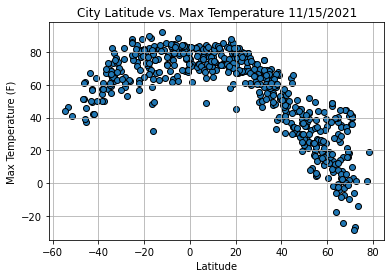

In [11]:
x_values = clean_temp["Lat"]
y_values = clean_temp["Max Temp"]
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show(close=None)

## Latitude vs. Humidity Plot

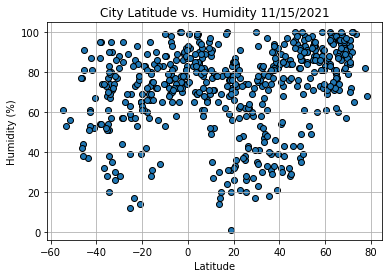

In [12]:
x_values = clean_temp["Lat"]
y_values = clean_temp["Humidity"]
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("City Latitude vs. Humidity.png")
plt.show(close=None)

## Latitude vs. Cloudiness Plot

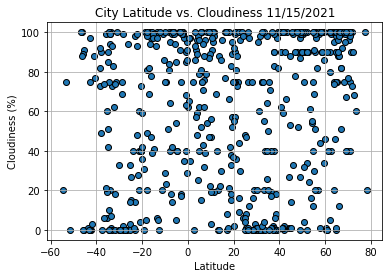

In [13]:
x_values = clean_temp["Lat"]
y_values = clean_temp["Cloudiness"]
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show(close=None)

## Latitude vs. Wind Speed Plot

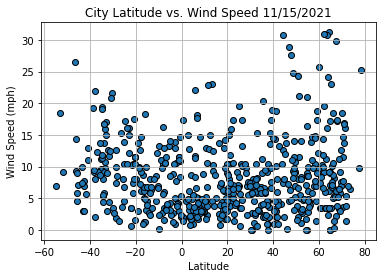

In [14]:
x_values = clean_temp["Lat"]
y_values = clean_temp["Wind Speed"]
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show(close=None)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
#Create new data frame for northern hemisphere latitudes only
north_hemi = clean_temp[clean_temp['Lat'].between(0,90)]
#Confirm only northern hemisphere latitudes displayed
north_hemi.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,thompson,90.0,CA,1.637037e+09,93.0,55.7435,-97.8558,26.76,4.61
1,erzin,99.0,RU,1.637037e+09,69.0,50.2610,95.1623,23.67,3.80
3,kapaa,75.0,US,1.637037e+09,81.0,22.0752,-159.3190,78.78,4.61
4,tiksi,100.0,RU,1.637037e+09,90.0,71.6872,128.8694,-6.05,5.35
5,chokurdakh,100.0,RU,1.637037e+09,96.0,70.6333,147.9167,9.79,3.69


In [16]:
#Create new data frame for southern hemisphere latitudes only
south_hemi = clean_temp[clean_temp['Lat'].between(-90,0)]
#Confirm only southern hemisphere latitudes displayed
south_hemi.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,mar del plata,49.0,AR,1.637037e+09,95.0,-38.0023,-57.5575,61.09,1.99
6,tuatapere,100.0,NZ,1.637037e+09,77.0,-46.1333,167.6833,51.15,9.33
9,rundu,81.0,NA,1.637037e+09,60.0,-17.9333,19.7667,70.02,6.20
11,cacu,100.0,BR,1.637037e+09,83.0,-18.5567,-51.1308,72.03,9.98
12,puerto ayora,40.0,EC,1.637037e+09,78.0,-0.7393,-90.3518,69.30,8.39


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.7679558630212959


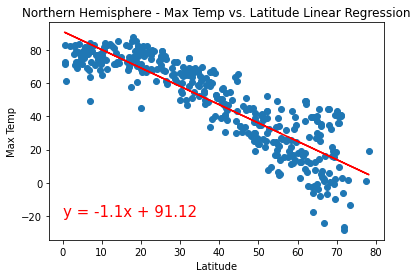

In [26]:
#Create the plot and Add the linear regression equation and line
x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]

#Add slope and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

#Print picture as .png
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
#Print R^2 value
print(f"The r value is: {rvalue**2}")
#Show scatter plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.3766859599780671


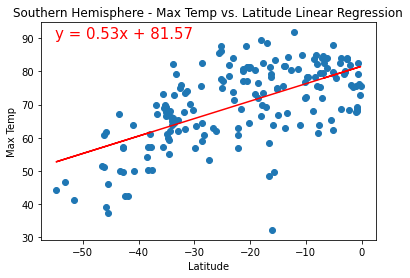

In [27]:
#Create the plot and Add the linear regression equation and line
x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]

#Add slope and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

#Print picture as .png
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
#Print R^2 value
print(f"The r value is: {rvalue**2}")
#Show scatter plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.08809488554233272


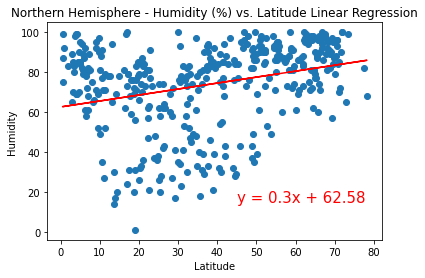

In [28]:
#Create the plot and Add the linear regression equation and line
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]

#Add slope and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#Print picture as .png
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
#Print R^2 value
print(f"The r value is: {rvalue**2}")
#Show scatter plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.11480364191818662


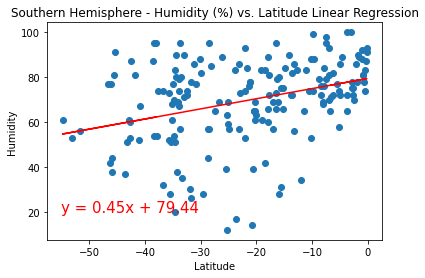

In [29]:
#Create the plot and Add the linear regression equation and line
x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]

#Add slope and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#Print picture as .png
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
#Print R^2 value
print(f"The r value is: {rvalue**2}")
#Show scatter plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.025612217224905143


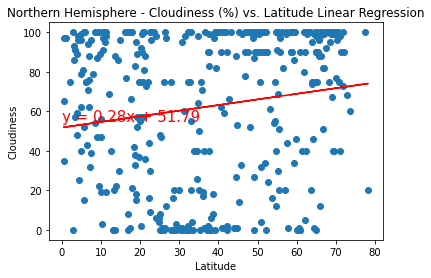

In [30]:
#Create the plot and Add the linear regression equation and line
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]

#Add slope and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,55),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#Print picture as .png
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
#Print R^2 value
print(f"The r value is: {rvalue**2}")
#Show scatter plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.060247462558864276


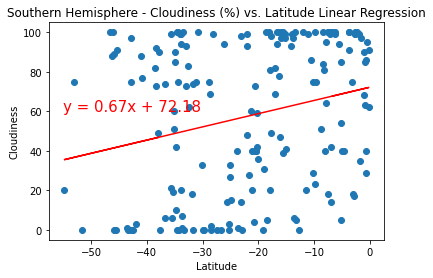

In [31]:
#Create the plot and Add the linear regression equation and line
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]

#Add slope and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#Print picture as .png
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
#Print R^2 value
print(f"The r value is: {rvalue**2}")
#Show scatter plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.04417081162459165


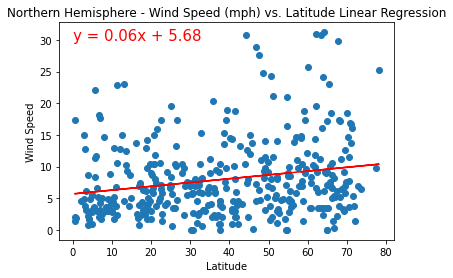

In [32]:
#Create the plot and Add the linear regression equation and line
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]

#Add slope and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#Print picture as .png
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
#Print R^2 value
print(f"The r value is: {rvalue**2}")
#Show scatter plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.07420081758417425


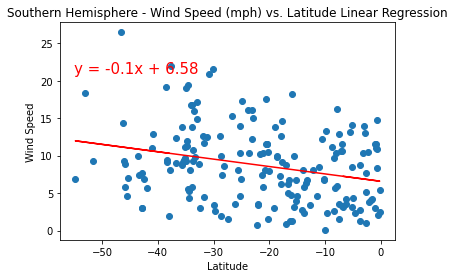

In [33]:
#Create the plot and Add the linear regression equation and line
x_values = south_hemi["Lat"]
y_values = south_hemi["Wind Speed"]

#Add slope and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,21),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#Print picture as .png
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
#Print R^2 value
print(f"The r value is: {rvalue**2}")
#Show scatter plot
plt.show()